## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [15]:
import os
import keras
import itertools

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],l1_ratio=1e-2,l2_ratio=1e-2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_RATIO=[1e-3, 1e-5, 1e-6]
L2_RATIO=[1e-3, 1e-5, 1e-6]

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1,l2 in itertools.product(L1_RATIO,L2_RATIO):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1=%.6f, L2=%.6f" % (l1,l2))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1,l2_ratio=l2)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1),str(l2))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1=0.001000, L2=0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [

50000/50000 [==============================] - 3s 53us/step - loss: 4.9486 - accuracy: 0.3651 - val_loss: 4.7532 - val_accuracy: 0.3333
Epoch 12/30
50000/50000 [==============================] - 3s 54us/step - loss: 4.5262 - accuracy: 0.3577 - val_loss: 4.3302 - val_accuracy: 0.3558
Epoch 13/30
50000/50000 [==============================] - 3s 53us/step - loss: 4.1695 - accuracy: 0.3573 - val_loss: 4.0513 - val_accuracy: 0.3332
Epoch 14/30
50000/50000 [==============================] - 3s 53us/step - loss: 3.8502 - accuracy: 0.3568 - val_loss: 3.7030 - val_accuracy: 0.3560
Epoch 15/30
50000/50000 [==============================] - 3s 54us/step - loss: 3.5569 - accuracy: 0.3612 - val_loss: 3.4272 - val_accuracy: 0.3552
Epoch 16/30
50000/50000 [==============================] - 3s 54us/step - loss: 3.2931 - accuracy: 0.3652 - val_loss: 3.1668 - val_accuracy: 0.3617
Epoch 17/30
50000/50000 [==============================] - 3s 54us/step - loss: 3.0561 - accuracy: 0.3677 - val_loss: 2.9757

Epoch 29/30
50000/50000 [==============================] - 3s 55us/step - loss: 2.0122 - accuracy: 0.3868 - val_loss: 2.0067 - val_accuracy: 0.3870
Epoch 30/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.9917 - accuracy: 0.3900 - val_loss: 1.9794 - val_accuracy: 0.3948
Experiment with L1=0.000010, L2=0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
____________________________________________________

50000/50000 [==============================] - 3s 55us/step - loss: 1.8812 - accuracy: 0.4832 - val_loss: 1.9003 - val_accuracy: 0.4719
Epoch 10/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.8553 - accuracy: 0.4918 - val_loss: 1.8983 - val_accuracy: 0.4771
Epoch 11/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.8307 - accuracy: 0.5004 - val_loss: 1.8651 - val_accuracy: 0.4847
Epoch 12/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.8096 - accuracy: 0.5075 - val_loss: 1.8490 - val_accuracy: 0.4883
Epoch 13/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.7862 - accuracy: 0.5161 - val_loss: 1.8430 - val_accuracy: 0.4886
Epoch 14/30
50000/50000 [==============================] - 3s 63us/step - loss: 1.7685 - accuracy: 0.5222 - val_loss: 1.8309 - val_accuracy: 0.4971
Epoch 15/30
50000/50000 [==============================] - 3s 57us/step - loss: 1.7499 - accuracy: 0.5275 - val_loss: 1.8434

50000/50000 [==============================] - 3s 53us/step - loss: 1.5541 - accuracy: 0.5894 - val_loss: 1.7217 - val_accuracy: 0.5279
Epoch 28/30
50000/50000 [==============================] - 3s 51us/step - loss: 1.5405 - accuracy: 0.5936 - val_loss: 1.7626 - val_accuracy: 0.5138
Epoch 29/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.5276 - accuracy: 0.5986 - val_loss: 1.7246 - val_accuracy: 0.5277
Epoch 30/30
50000/50000 [==============================] - 3s 51us/step - loss: 1.5136 - accuracy: 0.6031 - val_loss: 1.7609 - val_accuracy: 0.5137
Experiment with L1=0.000001, L2=0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________

50000/50000 [==============================] - 3s 57us/step - loss: 1.5966 - accuracy: 0.4582 - val_loss: 1.6210 - val_accuracy: 0.4462
Epoch 8/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.5703 - accuracy: 0.4668 - val_loss: 1.5680 - val_accuracy: 0.4652
Epoch 9/30
50000/50000 [==============================] - 3s 52us/step - loss: 1.5427 - accuracy: 0.4778 - val_loss: 1.5533 - val_accuracy: 0.4681
Epoch 10/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.5185 - accuracy: 0.4836 - val_loss: 1.5397 - val_accuracy: 0.4732
Epoch 11/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.4958 - accuracy: 0.4931 - val_loss: 1.5463 - val_accuracy: 0.4723
Epoch 12/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.4739 - accuracy: 0.5008 - val_loss: 1.5261 - val_accuracy: 0.4726
Epoch 13/30
50000/50000 [==============================] - 3s 57us/step - loss: 1.4555 - accuracy: 0.5078 - val_loss: 1.4968 -

50000/50000 [==============================] - 3s 55us/step - loss: 1.2302 - accuracy: 0.5828 - val_loss: 1.5059 - val_accuracy: 0.4920
Epoch 26/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.2170 - accuracy: 0.5872 - val_loss: 1.4035 - val_accuracy: 0.5182
Epoch 27/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.2011 - accuracy: 0.5934 - val_loss: 1.4030 - val_accuracy: 0.5187
Epoch 28/30
50000/50000 [==============================] - 3s 60us/step - loss: 1.1892 - accuracy: 0.5968 - val_loss: 1.3941 - val_accuracy: 0.5285
Epoch 29/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.1720 - accuracy: 0.6044 - val_loss: 1.4010 - val_accuracy: 0.5259
Epoch 30/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.1585 - accuracy: 0.6075 - val_loss: 1.3756 - val_accuracy: 0.5312


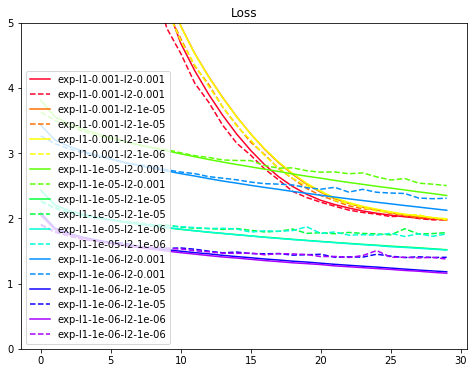

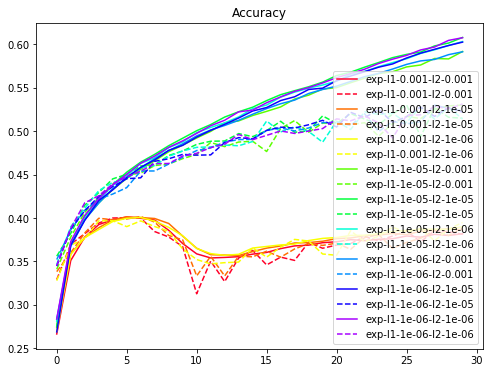

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()